# Credit Risk Prediction

## Exploring the Data

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv("data/proj19/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


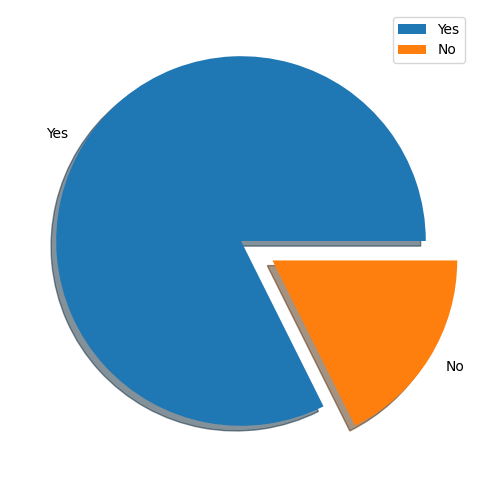

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(df["cb_person_default_on_file"].value_counts(), labels=["Yes", "No"], explode=[0, 0.2], shadow=True)
ax.legend()

## Pre-Processing the Data

In [108]:
import numpy as np

In [109]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [111]:

df["person_emp_length"] =  df["person_emp_length"].fillna(np.mean(df["person_emp_length"]))
df["loan_int_rate"] =  df["loan_int_rate"].fillna(np.mean(df["loan_int_rate"]))

In [112]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [113]:
from sklearn.preprocessing import LabelEncoder
for stuff in df.keys():
    if pd.api.types.is_object_dtype(df[stuff]) == True:
        le = LabelEncoder()
        df[stuff] = le.fit_transform(df[stuff])
        print(stuff)
        print("-"*10)
        print(le.classes_)
        print("-"*10)

person_home_ownership
----------
['MORTGAGE' 'OTHER' 'OWN' 'RENT']
----------
loan_intent
----------
['DEBTCONSOLIDATION' 'EDUCATION' 'HOMEIMPROVEMENT' 'MEDICAL' 'PERSONAL'
 'VENTURE']
----------
loan_grade
----------
['A' 'B' 'C' 'D' 'E' 'F' 'G']
----------
cb_person_default_on_file
----------
['N' 'Y']
----------


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.0 MB


## Preparing the data for training

In [115]:
X = df.drop("cb_person_default_on_file", axis=1)
y = df["cb_person_default_on_file"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(y_train), len(X_test), len(y_test)

(26064, 26064, 6517, 6517)

## Creating an model

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knclf = KNeighborsClassifier()
knclf.fit(X_train, y_train)
model_score = knclf.score(X_test, y_test)
print(str(round(model_score*100, 2)) + "% accuracy")

80.34% accuracy


In [121]:
from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier(random_state=42)
rclf.fit(X_train, y_train)
model_score = rclf.score(X_test, y_test)

print(str(round(model_score*100, 2)) + "% accuracy")

83.73% accuracy


In [118]:
from xgboost import XGBClassifier

xgclf = XGBClassifier()

In [144]:
xgclf.fit(X_train, y_train)
model_score = xgclf.score(X_test, y_test)
print(str(round(model_score*100, 2)) + "% accuracy")

83.34% accuracy


In [122]:
rclf.predict([[21, 30000, 2, 100.0, 4, 0, 20000, 10.3, 1, 0.43, 2]])

/home/djoe/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [123]:
knclf.predict([[21, 30000, 2, 100.0, 4, 0, 20000, 10.3, 1, 0.43, 2]])

/home/djoe/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])